In [1]:
%matplotlib inline
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import imageio
from numpy.random import randint, shuffle, choice

# Boostrapping

Bootstrapping - simulates distribution by drawing random samples with replacement. We will apply same tachnique for couple different tasks:
- A/B testing (placebo vs. drug)
- Confidence measures


## A/B Testing

Let's say that we have following obervations:

* In target group 20 customers converted from 500.
* In control group 70 customers converted from 1000.

Is this significant impact?

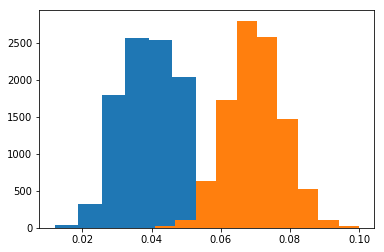

In [89]:
target = np.append(np.zeros(480), np.ones(20))
control = np.append(np.zeros(930), np.ones(70))

# Sample with replacement from both events as if they are generators
target_means = [np.random.choice(target, len(target)).mean() for _ in range(10000)]
control_means = [np.random.choice(control, len(control)).mean() for _ in range(10000)]

# Plot results
plt.hist(target_means)
plt.hist(control_means)
plt.show()

As we can see from conversion distributions displayed above, to test hypothesis we need to compare tail (5%) of control distribution (orange) and see if it exceeds middle of target distribution (blue) or vice versa.

In [90]:
control_lower, control_upper = np.percentile(control_means, [5, 95])
target_lower, target_upper = np.percentile(target_means, [5, 95])

# Test if mean falls between tails (both tests should pass to claim it's significant)
if ((control_lower < np.mean(target_means) < control_upper) |
    (target_lower < np.mean(control_means) < target_upper)):
    print('Difference is insignificant')
else:
    print('Difference is significant')

Difference is significant


Let's change the input slightly to:
* In target group 30 customers converted from 500.

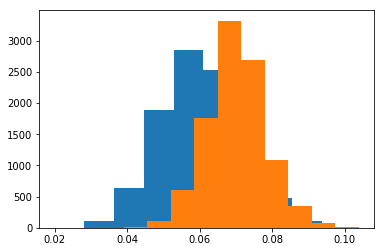

Difference is insignificant


In [95]:
target = np.append(np.zeros(470), np.ones(30))
control = np.append(np.zeros(930), np.ones(70))

target_means = [np.random.choice(target, len(target)).mean() for _ in range(10000)]
control_means = [np.random.choice(control, len(control)).mean() for _ in range(10000)]

plt.hist(target_means)
plt.hist(control_means)
plt.show()

control_lower, control_upper = np.percentile(control_means, [5, 95])
target_lower, target_upper = np.percentile(target_means, [5, 95])

if ((control_lower < np.mean(target_means) < control_upper) |
    (target_lower < np.mean(control_means) < target_upper)):
    print('Difference is insignificant')
else:
    print('Difference is significant')

This is not the most efficient way to do A/B test, but it is given for illustration purposes.

### Task. Mice study

In this study, 18 mice were randomly split into two groups. One group was on a normal light/dark
cycle and the other group had light during the day and dim light at night. The dim
light was equivalent to having a television set on in a room. The mice in darkness ate most of their
food during their active (nighttime) period, matching the behavior of mice in the wild. The mice
with dim light at night, however, consumed much of their food during the well-lit rest period, when
most mice are usually sleeping. The change in body mass was recorded after three weeks.

Source: Fonken, L., et. al., "Light at night increases body mass by shifting time of food intake," Proceedings
of the National Academy of Sciences, October 26, 2010; 107(43): 18664-18669.

**Question:** use the bootstrap by sampling with replacement from each variable separately 10000 times to
estimate the bootstrap sampling distribution of the difference between sample means. Test hypothesis $H_0$: µLight = µDark and estimate p-value.

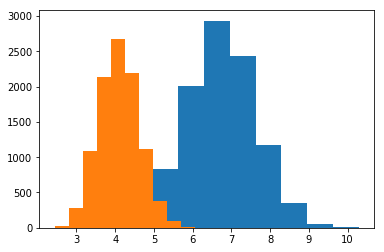

In [173]:
light = [9.17, 6.94, 4.99, 1.71, 5.43, 10.26, 4.67, 11.67, 7.15, 5.33]
dark = [2.83, 4.6, 6.52, 2.27, 5.95, 4.21, 4., 2.53]

dark_means = [np.random.choice(dark, len(dark)).mean() for _ in range(10000)]
light_means = [np.random.choice(light, len(light)).mean() for _ in range(10000)]

plt.hist(light_means)
plt.hist(dark_means)
plt.show()

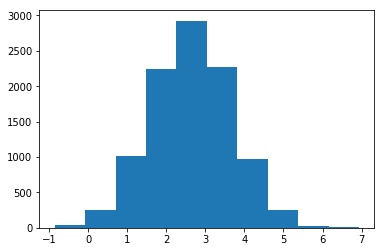

In [174]:
# Simulated diff between means
mean_diff = np.array(light_means) - np.array(dark_means)
plt.hist(mean_diff)
plt.show()

In [177]:
np.mean(mean_diff <= 0)    # p-value

0.0048

In [176]:
np.quantile(mean_diff, [.05, .95])

array([0.939725 , 4.3423625])

Either way it is clear that hypothesis is false and difference between light and dark groups is significant.

**Task.** Determine which out of these three drugs is the best one. Show that the difference is significant.

- Drug A = 45, 44, 34, 33, 45, 46, 34
- Drug B = 34, 34, 50, 49, 48, 39, 45
- Drug C = 24, 34, 23, 25, 36, 28, 33, 29

## Confidence in measure

Are confident when we calculate mean of the following dataset?

In [100]:
X = [48,24,32,61,51,12,32,18,19,24,21,41,29,21,25,23,42,18,23,13]
np.mean(X)

28.85

Let's draw samples and store means for future.

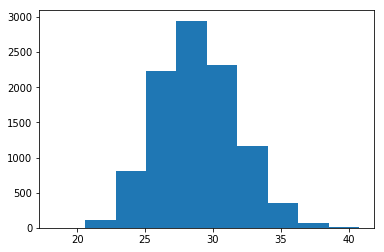

In [122]:
means = [np.random.choice(X, len(X)).mean() for _ in range(10000)]

plt.hist(means)
plt.show()

So more accurate would be to state, that

In [125]:
print('Mean is {0:.01f} +- {1:.01f}'.format(
    np.mean(means), np.std(means)))

Mean is 28.8 +- 2.9


## Confidence bounds of linear regression

We will apply same idea to determine confidence bounds of linear regression model.

In [33]:
from sklearn.linear_model import LinearRegression

In [11]:
np.random.seed(42)
x = np.random.rand(100)
x.sort()
y = x / 2 + 5 * x**2 + np.log(np.random.rand(100))/3

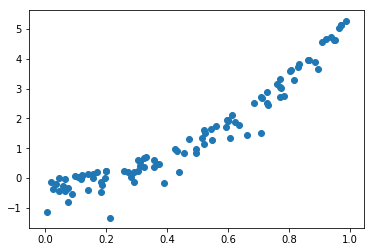

In [12]:
plt.scatter(x, y)

In [13]:
L = []   # initiate empty list
for _ in range(1000):
    indexes = np.random.choice(range(len(x)), len(x), True)

    lr = LinearRegression()
    lr.fit(x[indexes, np.newaxis],   # x
           y[indexes, np.newaxis])   # y

    k = lr.coef_[0][0]
    b = lr.intercept_[0]

    L.append([k, b])   # add results to list

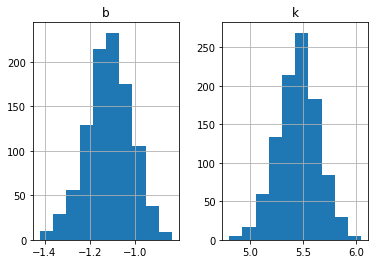

In [14]:
df = pd.DataFrame(L, columns=['k', 'b'])
df.hist()
plt.show()

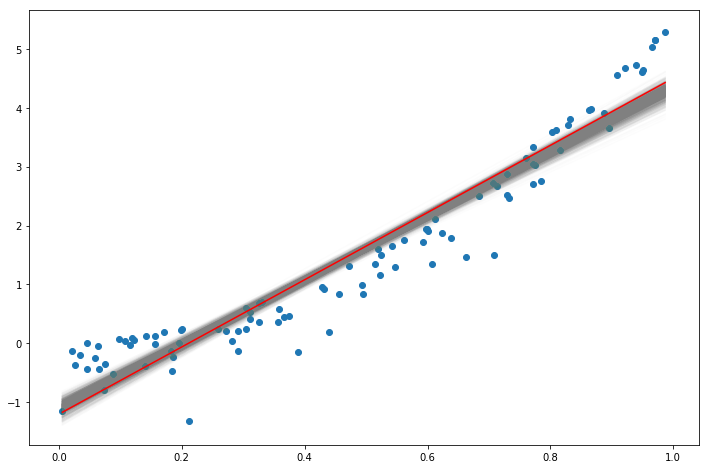

In [15]:
fig = plt.figure(figsize=(12,8))

# Plot all 1000 lines which we have generated
for k, b in df.values:
    plt.plot(x, k * x + b, alpha=0.02, color='grey')
    
# Let's plot average line
plt.plot(x, np.mean(k) * x + np.mean(b), color='red')
# and points
plt.scatter(x, y)
plt.show()